In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
target = "charges"

In [5]:
X = df.drop(columns=target)
X

,age,gender,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [6]:
y = df[target]

In [7]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [10]:
X = pd.get_dummies(X, drop_first=True)

In [11]:
X

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [12]:
from sklearn import model_selection

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)

In [14]:
X_test.shape

(402, 8)

In [17]:
X_train.shape

(936, 8)

In [18]:
936/len(X)

0.6995515695067265

In [67]:
np.random.seed(1)
np.random.random(3)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04])

In [68]:
from sklearn import linear_model

In [69]:
est = linear_model.LinearRegression()
est.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
est.coef_

array([  251.68186515,   322.38910684,   344.9642553 ,  -282.79634661,
       24059.39047692,  -304.09009765,  -939.34209691,  -868.18855866])

In [71]:
pd.DataFrame({"feature": X.columns, "coefficient": est.coef_})

,feature,coefficient
0,age,251.681865
1,bmi,322.389107
2,children,344.964255
3,gender_male,-282.796347
4,smoker_yes,24059.390477
5,region_northwest,-304.090098
6,region_southeast,-939.342097
7,region_southwest,-868.188559


In [72]:
est.intercept_

-11039.23841856155

In [73]:
y_train_pred = est.predict(X_train)

In [74]:
y_test_pred = est.predict(X_test)

In [77]:
summary = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
summary["error"] = summary.predict -summary.actual
summary

,actual,predict,error
559,1646.42970,4610.315541,2963.885841
1087,11353.22760,12887.893880,1534.666280
1020,8798.59300,12573.948752,3775.355752
460,10381.47870,13197.836626,2816.357926
802,2103.08000,629.337182,-1473.742818
...,...,...,...
323,11566.30055,16224.053528,4657.752978
1268,1880.48700,3861.767583,1981.280583
134,2457.21115,3274.369325,817.158175
1274,17043.34140,27065.591340,10022.249940


In [79]:
%matplotlib inline

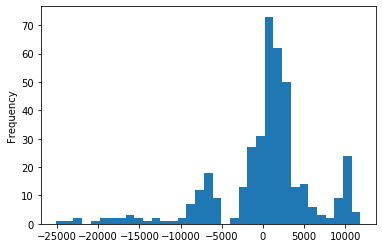

In [81]:
summary.error.plot.hist(bins = 35)

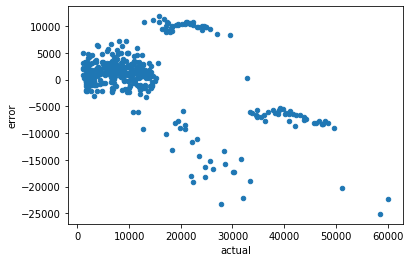

In [82]:
summary.plot.scatter("actual", "error")

In [83]:
import matplotlib.pyplot as plt

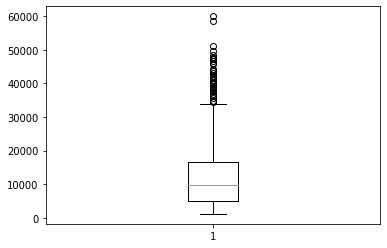

In [85]:
plt.boxplot(y_test);

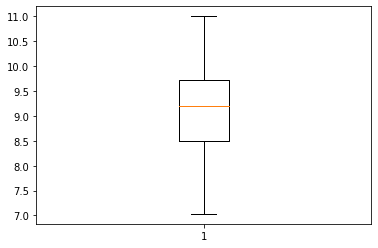

In [86]:
plt.boxplot(np.log(y_test));

In [100]:
y = np.log(df[target])
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 1)

est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

summary = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
summary["error"] = summary.predict -summary.actual


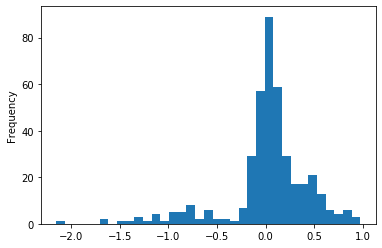

In [90]:
summary.error.plot.hist(bins = 35)

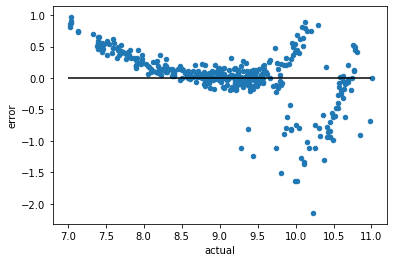

In [93]:
summary.plot.scatter("actual", "error")
plt.hlines(0, 7, 11)

In [97]:
sse = (summary.error ** 2).sum()
sse

71.88215398979395

In [98]:
mse = (summary.error ** 2).mean()
mse

0.17881132833282085

In [99]:
from sklearn import metrics

In [101]:
metrics.mean_squared_error(y_train, y_train_pred)

0.20407164987815388

In [102]:
metrics.mean_squared_error(y_test, y_test_pred)

0.17881132833282076

In [104]:
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
r2_train, r2_test

(0.7589104330619343, 0.78742951961976)